In [1]:
import os 
import copy 
from IFlogdensity.contam_sm_de_finkernelexpfam import *

import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0].reshape(-1, 1)

bw = 9.
kernel_type = 'gaussian_poly2'
contam_weight = 1e-3
plot_domain = (1., 310.)
plot_pts_cnt = 3000

base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])

contam_pt = 20.

In [3]:
grid_points = np.arange(1., 311.,1).reshape(-1, 1)

In [4]:
uncsmfin = ContamSMFinKernelExpFam(
    data = data_waiting, 
    contam_data = np.array([contam_pt]).reshape(-1, 1), 
    grid_points = grid_points, 
    contam_weight = 0., 
    penalty_param = np.exp(-10.), 
    base_density = base_density,
    r1=1.0, r2=0.0, c=0., bw=bw, kernel_type='gaussian_poly2')

In [5]:
uncoef = uncsmfin.coef()
np.sqrt((uncoef.T @ uncsmfin.gram_matrix @ uncoef).item())

7.02148061748487

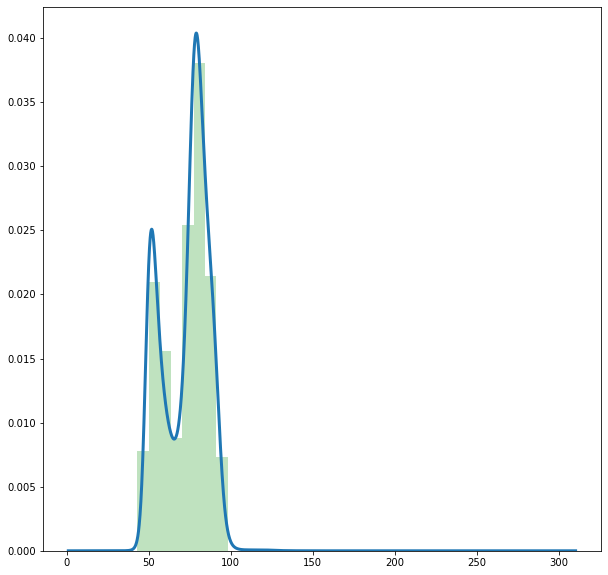

In [6]:
new_data = np.linspace(1., 310., 3000)
uncontam_logden = uncsmfin.log_density(new_data, uncoef, compute_base_density=True)

plt.figure(figsize = (10, 10))
plt.plot(new_data, np.exp(uncontam_logden), color = 'tab:blue', lw = 3.)
plt.hist(data_waiting, bins='fd', density = True, alpha = 0.3, color = 'tab:green')
plt.show()

In [7]:
csmfin = ContamSMFinKernelExpFam(
    data = data_waiting, 
    contam_data = np.array([contam_pt]).reshape(-1, 1), 
    grid_points = grid_points, 
    contam_weight = contam_weight, 
    penalty_param = np.exp(-10.), 
    base_density = base_density,
    r1=1.0, r2=0.0, c=0., bw=bw, kernel_type='gaussian_poly2')

In [8]:
coef = csmfin.coef()
np.sqrt((coef.T @ csmfin.gram_matrix @ coef).item())

7.2249431999362885

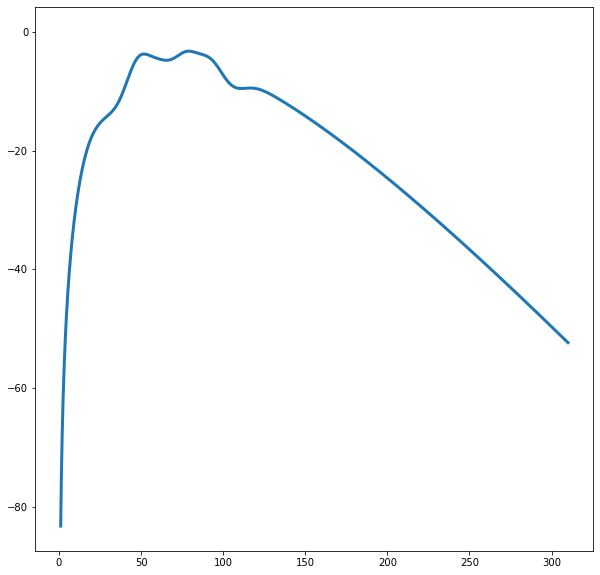

In [9]:
contam_logden = csmfin.log_density(new_data, coef, compute_base_density=True)

plt.figure(figsize = (10, 10))
plt.plot(new_data, contam_logden, color = 'tab:blue', lw = 3.)
plt.hist(data_waiting, bins='fd', density = True, alpha = 0.3, color = 'tab:green')
plt.show()

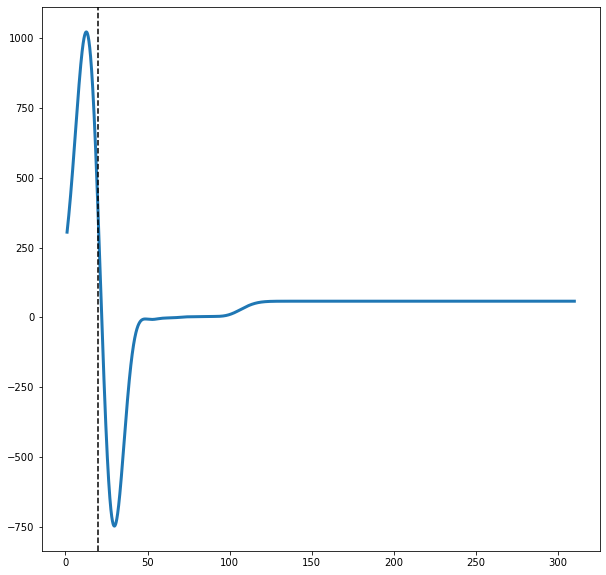

In [10]:
plt.figure(figsize = (10, 10))
plt.plot(new_data, (contam_logden - uncontam_logden) / contam_weight, color = 'tab:blue', lw = 3.)
plt.axvline(x = contam_pt, color = 'k', linestyle='--')
plt.show()

In [11]:
np.max(np.abs((contam_logden - uncontam_logden) / contam_weight))

1022.8241776447966